# Análisis predictivo con métodos combinados de aprendizaje (Ensemble Learning)

El aprendizaje combinado se refiere al proceso de construir múltiples  modelos  y combinarlos de tal forma que puedan producir mejores resultados que los modelos individuales. Estos modelos individuales pueden ser clasificadores, regresores, o cualquier otra cosa que modele datos de alguna forma. El aprendizaje combinado es utilizado en múltiples campos aplicaicón incluyendo la clasificación de datos, modelamiento predictivo, detección de anomalías, entre otrors.

*Ejemplo*

Supongamos que queremos comprar un nuevo televisor, pero no tenemos conocimiento de cuáles son los últimos modelos. Nuestro objetivo es obtener el mejor valor por el dinero que tenemos, pero no tenemos suficiente conocimiento sbore este tópico para tomar una decisión bien informada. Cuando queremos tomar una decisión acerca de este tipo de cosas, lo que hacemos es tratar de obtener opinioes de múltiples expertos en el tema. Esto nos ayudará  a tomar la mejor decisión. En lugar de basarnos en una sola opinión, tendemos a tomar una decisión final combinando las decisiones individuales de estos expertos. La razón de hacer esto es que queremos minimizar la posibilidad de una decisión errónea.


## Árboles de decisión

Un árbol de decisión es una estructura que nos permite dividir el conjunto de datos en ramas y tomar decisiones simples en cada nivel. Esto nos permitirá llegar a una decisión final caminando hacia abajo del árbol. Los árboles de decisión están constituidos por:

1. **Nodos interiores**: atributos
2. **Arcos**: posibles valores del nodo origen
3. ** Hojas**: valor de clasificación (usualmente + y -, aunque podría ser cualquier conjunto de valores, no necesariamente binario)

![Arbol](arbol.png)

Los árboles de decisión se  producen por los algoritmos de entrenamiento, los cuales identifican cómo se pueden dividir los datos de la mejor manera posible.

Cualquier proceso de decisión inicia en el nodo raíz en la cima del árbol. Cada nodo es el árbol es básicamente una regla de decisión. Los algoritmos construyen estas reglas con base en la relación entre los datos de entrada y las etiquetas en el conjunto de entrenamiento. Los valores en el conjunto de entrada se utilizan para  estimar los valores de la salida. 

Con el fin de entender cómo construyen los algoritmos el árbol óptimo basado en nuestros datos. Para ello es necesario entender el concepto de entropía de la información. La entropía es básicamente una medida de incertidumbre. Una de las principales metas de un árbol de decisión es reducir la incertidumbre a medida que nos movemos del nodo raíz a los nodos hojas. Esto significa que debemos construir un árbol de decisión de tal manera que se reduzca la incertidumbre en cada nivel. Esto implica que se necesita reducir la entropía a medida que se progresa hacia abajo del árbol.

*Ejemplos de árboles de decisión*
![Arbol_1](ejemplo_arbol_1.png)
![Arbol_2](ejemplo_arbol_2.png)


La disyunciónn de reglas proposicionales será del siguiente tipo:

(Cielo = Soleado ∧ Humedad = Alta → Jugar Tenis = −)
∨ (Cielo = Soleado ∧ Humedad = Normal → Jugar Tenis = +)
∨ (Cielo = Nublado → Jugar Tenis = +)
∨ (Cielo = Lluvioso ∧ V iento = Fuerte → Jugar Tenis = −)
∨ (Cielo = Lluvioso ∧ V iento = Debil → Jugar Tenis = +)

**Obetivo**
El objetivo es aprender árbol de decisión consiste con los ejemplos para posteriormente clasificar ejemplos nuevos:

Algunos ejemplos de conjuntos de entrenamiento son:

![tabla1](tabla1.jpg)
![tabla2](tabla2.jpg)

### Algoritmo ID3

El algoritmo ID3 es utilizado dentro del ámbito de la inteligencia artificial. Su uso se engloba en la búsqueda de hipótesis o reglas en él, dado un conjunto de ejemplos. 

El conjunto de ejemplos deberá estar conformado por una serie de tuplas de valores, cada uno de ellos denominados atributos, en el que uno de ellos, ( el atributo a clasificar ) es el objetivo, el cual es de tipo binario ( positivo o negativo, sí o no, válido o inválido, etc. ).

De esta forma el algoritmo trata de obtener las hipótesis que clasifiquen ante nuevas instancias, si dicho ejemplo va a ser positivo o negativo.

**ID3(Ejemplos, Atributo-objetivo, Atributos)**

1. Si todos los Ejemplos son positivos, devolver un nodo etiquetado con +
2. Si todos los Ejemplos son negativos, devolver un nodo etiquetado con -
3. Si Atributos está vacío, devolver un nodo etiquetado con el valor más frecuente de Atributo-objetivo en Ejemplos.
4. En otro caso: 
4.1. Sea $A$ el atributo de Atributos que MEJOR clasifica Ejemplos
4.2. Crear Árbol, con un nodo etiquetado con $A$.
4.3. Para cada posible valor $v$ de $A$, hacer:
    * Añadir un arco a Árbol, etiquetado con $v$.
    * Sea Ejemplos($v$) el subconjunto de Ejemplos con valor del atributo $A$ igual a $v$.
    * Si Ejemplos($v$) es vacío:
     - Entonces colocar debajo del arco anterior un nodo etiquetado con el valor más frecuente de Atributo-objetivo en Ejemplos.
      - Si no, colocar debajo del arco anterior el sub árbol
    ID3(Ejemplos($v$), Atributo-objetivo, Atributos-{$A$}).
    
        4.4 Devolver árbol


### ¿Cómo saber qué atributo clasifica mejor?

Entropía de un conjunto de ejemplos $D$:

$$Ent(D)=-\frac{|P|}{|D|}\log_{2}\frac{|P|}{|D|}-\frac{|N|}{|D|}\log_{2}\frac{|N|}{|D|}$$

  donde $P$ y $N$ son los subconjuntos de ejemplos positivos y negativos de $D$. La notación es $Ent([p+,n-])$
  
**Ejemplos**
$Ent([9+,5-])=\frac{|9|}{|14|}\log_{2}\frac{|9|}{|14|}-\frac{|5|}{|14|}\log_{2}\frac{|5|}{|14|}=0.94$

Preferimos nodos conmenos entropía (árboles pequeños).

La **entropía esperada** después de usar un atributo $A$ igual a $v$

$$\sum_{v\in Valores(A)}\frac{|D_v|}{|D|}Ent(D_v)$$

donde $D_v$ es el subconjunto de ejemplos de $D$ con valor del atributo $A$ igual a $v$

La **ganancia de información esperada** después de usar un atributo $A$:

$$Ganancia(D,A)=Ent(D)-\sum_{v\in Valores(A)}\frac{|D_v|}{|D|}Ent(D_v)$$

En el algoritmo ID3, en cada nodo usamos el atributo con mayor ganacia de información (considerando los ejemplos correspondientes al nodo)

*ejemplo*

![arbol_ejemplo](ejemplo_arbol.jpg)

![paso1](paso1.jpg)
![paso2](paso2.jpg)
![paso3](paso3.jpg)
![paso4](paso4.jpg)

## Construcción de un clasificador de árbol de decisión

A continuación construiremos un árbol de decisión con python:

In [1]:
# primero importamos las librerías necesarias

import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
from sklearn import cross_validation 
from sklearn.tree import DecisionTreeClassifier 
import numpy as np 

C:\Users\LMSEPULVEDA\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# cargamos los datos
input_file = 'datos_arboles.txt'
datos = np.loadtxt(input_file,delimiter =',')
X, y = datos[:,:-1], datos[:,-1]

In [3]:
# sepramos los datos en dos clases separadas basados en las etiquetas
clase0 = np.array(X[y==0])
clase1 = np.array(X[y==1]) 

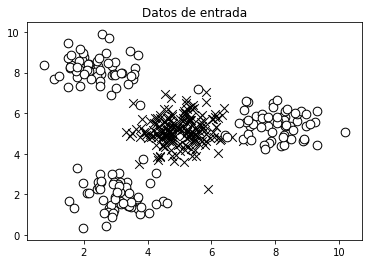

In [4]:
# visualizamos los datos
plt.figure()
plt.scatter(clase0[:, 0], clase0[:, 1], s=75, facecolors='black',  
            edgecolors='black', linewidth=1, marker='x') 
plt.scatter(clase1[:, 0], clase1[:, 1], s=75, facecolors='white',  
            edgecolors='black', linewidth=1, marker='o') 
plt.title('Datos de entrada')
plt.show()

In [5]:
# dividimos los datos en entrenamiento y validación
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
                                           test_size=0.25, 
                                           random_state = 5)


In [6]:
def visualizar_clasificador(clasificador, X, y):   
    #definimos los máximos valores de X e y para la malla
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    #definimos el paso de la malla
    mesh_step_size = 0.01
    #definimos la malla para x e y
    x_vals, y_vals = np.mgrid[min_x:max_x:mesh_step_size, min_y:max_y:mesh_step_size]
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #reordenamos la salida
    print(resultados)
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    #elegimos los colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.Paired)
    #ubicamos los puntos
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.Paired)
    #especificamos los límites de la gráfica
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max())
    #especificamos los puntos que se visualizarán sobre los ejes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    #Graficamos
    plt.show()

[ 1.  1.  1. ...,  1.  1.  1.]


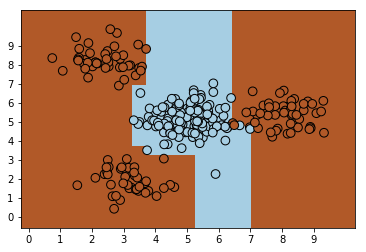

In [7]:
# construimos el árbol de decisión, el parámetro max_depth se refiere a la profundidad del árbol
parametros = {'random_state':0,'max_depth':4}
clasificador = DecisionTreeClassifier(**parametros)
clasificador.fit(X_train, y_train)
visualizar_clasificador(clasificador,X_train,y_train)

[ 1.  1.  1. ...,  1.  1.  1.]


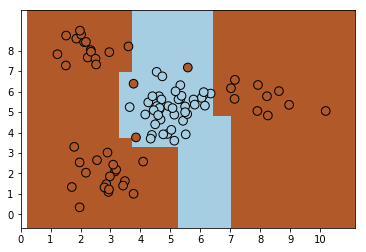

In [8]:
#validamos en el grupo de test
y_test_pred = clasificador.predict(X_test)
visualizar_clasificador(clasificador,X_test,y_test)

In [9]:
#evaluamos el desempeño del clasificador imprimiendo el reporte de clasificación
nombres_clases = ['Clase 0', 'Clase 1']
print('\n'+"#"*40)
print('\n Desempeño del clasificador sobre el conjunto de entrenamiento\n')
print(classification_report(y_train, clasificador.predict(X_train), target_names = nombres_clases)) 
print("#"*40 + "\n")

print("#"*40) 
print("\n Desempeño del clasificador sobre el conjunto de validación\n") 
print(classification_report(y_test, y_test_pred, target_names = nombres_clases)) 
print("#"*40 + "\n")
plt.show()

#la presición se refiere al acierto de la clasificación y el recall se refiere
# al número de items que fueron recuperados como un porcentaje sobre elnúmero
# de items que se deberían recuperar. F1 es la media armónica entre la precisión 
# y el recall.



########################################

 Desempeño del clasificador sobre el conjunto de entrenamiento

             precision    recall  f1-score   support

    Clase 0       0.99      1.00      1.00       137
    Clase 1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270

########################################

########################################

 Desempeño del clasificador sobre el conjunto de validación

             precision    recall  f1-score   support

    Clase 0       0.93      1.00      0.97        43
    Clase 1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90

########################################



## Bosques aleatorios y extremadamente aleatorios

Un bosque aleatorio es una instancia particular de aprendizaje combinado donde se construyen modelos individuales usando árboles de decisión. Esta combinación se utiliza para predecir el valor de salida. En este caso, utilizamos un subconjunto aleatorio de entrenamiento para construir cada árbol de decisión, lo que asegurará la diversidad entre los árboles de decisión.

Una de las mejores caracteríticas de lo bosques aleatorios es que no se sobre-entrenan. 

Durante la construcción del árbol, los nodos se dividen sucesivamente y los mejores umbrales se eligen para reducir la entropía en cada nivel. Esta división no considera todas las características o atributos del conjunto de entrada. En lugar de esto, en el bosque aleatorio se selecciona la mejor divisón dentro de un subconjunto aleatorio de características que están bajo su consideración.  Esta aleatoriedad adicional tienda a incrementar el sesgo del bosque aleatorio, pero la varianza disminuye debido al promedio. Finalmente se puede obtener un modelo robusto.

Los **bosques extremadamente aleatorios** llevan la aleatoriedad a otro nivel. Además de tomar un subconjunto aleatorio de características, los umbrales también son aleatorios. Estos umbrales generados aleatoriamente se eligen como las reglas de división, lo que reduce aún más la varianza del modelo. Por lo tanto, los límites de decisión obtenidos usando los bosques extremadamente aleatorios tienden a ser más suaves que los obtenidos usando los bosques aleatorios.

## Construcción de clasificadores de bosque aleatorio y bosque extremadamente aleatorio

La construcción de ambos clasificadores es bastante similar, por tanto se utilizará una bandera de entrada para especificar cuál de los dos ne desea construir.